In [2]:
import numpy as np

In [24]:
import csv

In [4]:
from sklearn.decomposition import PCA

In [39]:
from itertools import cycle, islice
import matplotlib.pyplot as plt

In [5]:
X = np.array([[ 1.,  0.48703147,  0.57117438,  0.60908524,  0.48871432,   0.83760221,  0.85923769,  0.81479191,  0.78000252,  0.85716663,   0.91633139,  0.85797933,  0.7332766 ,  0.7332766 ,  0.89360923,   0.89238888,  0.91170949,  0.87368302,  0.84680473,  0.76393149,   0.85796246,  0.91210555,  0.9152318 ,  0.96218831,  0.9563227 ,   0.85837092,  0.89634894,  0.96471802,  0.95920856,  0.86861467,   0.88436161,  0.84345122,  0.61052615,  0.5087966 ,  0.45367696,   0.83364472,  0.8899537 ,  0.87047231,  0.77124244,  0.84305303,   0.80840739,  0.36580438,  0.36580438,  0.2795759 ,  0.2795759 ,   0.84535134,  0.91105525,  0.67236238,  0.85838288,  1.], [   0.48703147,  1.,  0.88500732,  0.97942603,  0.99781828,   0.63632422,  0.69383788,  0.63508527,  0.71962993,  0.66598178,   0.6382759 ,  0.76014776,  0.49046457,  0.49046457,  0.6042062 ,   0.60339191,  0.60342836,  0.69362484,  0.65310595,  0.66460186,   0.64738682,  0.71243404,  0.5893326 ,  0.60348556,  0.61696684,   0.79197445,  0.76230787,  0.62053935,  0.64873585,  0.64416044,   0.59332443,  0.61190713,  0.56048809,  0.48405027,  0.42840838,   0.60124069,  0.60158819,  0.66254337,  0.58246144,  0.59601799,   0.62042361,  0.97373616,  0.97373616,  0.51795474,  0.51795474,   0.74408866,  0.65176627,  0.9481307 ,  0.67932607,  0.48703147], [  0.57117438,  0.88500732,  1.,  0.90625639,  0.85905736,   0.83777666,  0.85999894,  0.84657336,  0.91049479,  0.84675471,   0.7927645 ,  0.88018516,  0.74650955,  0.74650955,  0.78655701,   0.78669111,  0.77459726,  0.85070523,  0.84439675,  0.88461192,   0.83520316,  0.82026036,  0.76224088,  0.72863477,  0.74236207,   0.76874766,  0.78312521,  0.73068465,  0.74243614,  0.82750471,   0.78379171,  0.81783572,  0.83720324,  0.77598947,  0.72147213,   0.81400914,  0.78679789,  0.83733028,  0.82137378,  0.80594018,   0.83853155,  0.79109614,  0.79109614,  0.76926282,  0.76926282,   0.8872104 ,  0.80396792,  0.93987013,  0.85335618,  0.57117438], [   0.60908524,  0.97942603,  0.90625639,  1.,  0.97871536,   0.73529544,  0.79415756,  0.73044935,  0.80458843,  0.76704346,   0.7494881 ,  0.85720351,  0.57792743,  0.57792743,  0.71256313,   0.7115817 ,  0.71445771,  0.79640008,  0.75295355,  0.74999973,   0.74922424,  0.82121421,  0.70100801,  0.72199013,  0.73456348,   0.8895771 ,  0.86756863,  0.73947636,  0.76676769,  0.74778894,   0.70049342,  0.71256289,  0.62537928,  0.5361023 ,  0.4746809 ,   0.70069894,  0.70944788,  0.76589005,  0.67293585,  0.69703254,   0.71533142,  0.91311212,  0.91311212,  0.51176542,  0.51176542,   0.83961313,  0.76188912,  0.98913619,  0.7800837 ,  0.60908524], [  0.48871432,  0.99781828,  0.85905736,  0.97871536,  1.,   0.61813272,  0.67880289,  0.6152413 ,  0.69871384,  0.6498824 ,   0.62735447,  0.74905221,  0.46808315,  0.46808315,  0.59024235,   0.58931084,  0.59116086,  0.68006866,  0.63586068,  0.64160878,   0.63096152,  0.70561816,  0.57722336,  0.59781021,  0.61090365,   0.80046635,  0.76598039,  0.61651977,  0.6462326 ,  0.62858851,   0.57847734,  0.59397877,  0.53076545,  0.45295421,  0.39800435,   0.58260058,  0.58727577,  0.64756403,  0.56006287,  0.57803503,   0.60009292,  0.975752,  0.975752,  0.47947783,  0.47947783,   0.73013857,  0.64070824,  0.9417441 ,  0.66370756,  0.48871432], [  0.83760221,  0.63632422,  0.83777666,  0.73529544,  0.61813272,   1.,  0.99254168,  0.99897034,  0.98696179,  0.99737032,   0.98256936,  0.96679632,  0.95719875,  0.95719875,  0.9922416 ,   0.99250918,  0.98626353,  0.98913323,  0.99931011,  0.98996292,   0.99874759,  0.95693832,  0.98399019,  0.94795282,  0.95255206,   0.81776234,  0.86987729,  0.93746834,  0.92793747,  0.9975334 ,   0.99349238,  0.99916651,  0.92046279,  0.84285912,  0.78921405,   0.99822907,  0.99298927,  0.99566533,  0.98801578,  0.99778384,   0.99786566,  0.49892909,  0.49892909,  0.60292198,  0.60292198,   0.97961426,  0.98325197,  0.81631809,  0.99541746,  0.83760221], [  0.85923769,  0.69383788,  0.85999894,  0.79415756,  0.67880289,   0.99254168,  1.,  0.98818718,  0.98815598,  0.99863656,   0.99054823,  0.99047047,  0.91635225,  0.91635225,  0.98857009,   0.98845235,  0.98630893,  0.99939093,  0.99636057,  0.97882502,   0.99651467,  0.98274333,  0.98234151,  0.96336703,  0.96868176,   0.87618455,  0.91917127,  0.95865385,  0.9554805 ,  0.99652144,   0.98617159,  0.98825457,  0.88329208,  0.79411059,  0.73429738,   0.98411998,  0.98814105,  0.99862189,  0.96361323,  0.98414246,   0.98372918,  0.55496168,  0.55496168,  0.57632136,  0.57632136,   0.99615696,  0.99278066,  0.86713307,  0.99962354,  0.85923769], [  0.81479191,  0.63508527,  0.84657336,  0.73044935,  0.6152413 ,   0.99897034,  0.98818718,  1.,  0.98920553,  0.99394891,   0.97327489,  0.95972822,  0.96464713,  0.96464713,  0.9860637 ,   0.98646815,  0.9781094 ,  0.9832387 ,  0.99715383,  0.99475863,   0.99561389,  0.94516737,  0.97557191,  0.93302914,  0.93820824,   0.79987474,  0.8528079 ,  0.92141758,  0.91129939,  0.99339596,   0.98836357,  0.99787035,  0.93659167,  0.8643296 ,  0.81277873,   0.99790724,  0.98722037,  0.99096933,  0.99304568,  0.99663578,   0.99960957,  0.49867062,  0.49867062,  0.62879029,  0.62879029,   0.97485037,  0.97426591,  0.81226401,  0.99155562,  0.81479191], [  0.78000252,  0.71962993,  0.91049479,  0.80458843,  0.69871384,   0.98696179,  0.98815598,  0.98920553,  1.,  0.98764014,   0.95914195,  0.97511071,  0.92756627,  0.92756627,  0.96432762,   0.96457619,  0.95592352,  0.9826359 ,  0.98843576,  0.99475122,   0.9850241 ,  0.94915752,  0.95016694,  0.9127584 ,  0.92066869,   0.83063985,  0.87357387,  0.90591625,  0.90295889,  0.98159722,   0.9644114 ,  0.97996632,  0.93055289,  0.85558494,  0.79996463,   0.97816046,  0.96498079,  0.98330881,  0.97373792,  0.97514162,   0.98594715,  0.58456817,  0.58456817,  0.66931384,  0.66931384,   0.98690851,  0.96328843,  0.87719215,  0.98823979,  0.78000252], [  0.85716663,  0.66598178,  0.84675471,  0.76704346,  0.6498824 ,   0.99737032,  0.99863656,  0.99394891,  0.98764014,  1.,   0.9906027 ,  0.98201304,  0.93452059,  0.93452059,  0.99327622,   0.99330057,  0.98986379,  0.99717169,  0.99936333,  0.9834991 ,   0.99949548,  0.97484455,  0.98681206,  0.96167745,  0.96644329,   0.85403384,  0.90136353,  0.95450607,  0.94839121,  0.99924243,   0.99230526,  0.99485643,  0.8968486 ,  0.81147157,  0.75390426,   0.9919525 ,  0.99328406,  0.99958642,  0.97466291,  0.99202285,   0.9908864 ,  0.5272499 ,  0.5272499 ,  0.58145902,  0.58145902,   0.99044747,  0.99196944,  0.84392383,  0.99969263,  0.85716663], [  0.91633139,  0.6382759 ,  0.7927645 ,  0.7494881 ,  0.62735447,   0.98256936,  0.99054823,  0.97327489,  0.95914195,  0.9906027 ,   1.,  0.97871708,  0.90355663,  0.90355663,  0.99522462,   0.99488924,  0.99770228,  0.9936284 ,  0.98694809,  0.95052873,   0.99022612,  0.98797659,  0.99619144,  0.98992963,  0.99221648,   0.88304737,  0.92876694,  0.98534502,  0.97962749,  0.99307613,   0.99175289,  0.98212825,  0.83793575,  0.74235203,  0.68231753,   0.97698174,  0.99416818,  0.99410027,  0.94540811,  0.97972243,   0.96894337,  0.4995448 ,  0.4995448 ,  0.49926773,  0.49926773,   0.98108617,  0.99974521,  0.82440234,  0.99089741,  0.91633139], [  0.85797933,  0.76014776,  0.88018516,  0.85720351,  0.74905221,   0.96679632,  0.99047047,  0.95972822,  0.97511071,  0.98201304,   0.97871708,  1.,  0.85767552,  0.85767552,  0.9643584 ,   0.96385738,  0.96545733,  0.99241231,  0.97536645,  0.95234797,   0.9757973 ,  0.99208259,  0.95932025,  0.95770592,  0.9642099 ,   0.92723775,  0.95728235,  0.95965266,  0.96431113,  0.97668508,   0.95821124,  0.95824194,  0.83422518,  0.73647587,  0.67214476,   0.95091997,  0.96275533,  0.98329888,  0.92169529,  0.95100881,   0.95173411,  0.62395568,  0.62395568,  0.55006131,  0.55006131,   0.99791207,  0.98304223,  0.91756558,  0.98635282,  0.85797933], [  0.7332766 ,  0.49046457,  0.74650955,  0.57792743,  0.46808315,   0.95719875,  0.91635225,  0.96464713,  0.92756627,  0.93452059,   0.90355663,  0.85767552,  1.,  1.,  0.93907739,   0.94023726,  0.92443892,  0.90655731,  0.94608694,  0.95880518,   0.94352681,  0.84207881,  0.92583299,  0.85300638,  0.85614301,   0.64957231,  0.71421047,  0.83101109,  0.80927467,  0.93925188,   0.94878233,  0.96398579,  0.96101409,  0.92154199,  0.89005856,   0.97079149,  0.94255348,  0.92868568,  0.98764784,  0.96890687,   0.97152705,  0.36762735,  0.36762735,  0.64311513,  0.64311513,   0.88515326,  0.90110133,  0.6671523 ,  0.92618026,  0.7332766 ], [  0.7332766 ,  0.49046457,  0.74650955,  0.57792743,  0.46808315,   0.95719875,  0.91635225,  0.96464713,  0.92756627,  0.93452059,   0.90355663,  0.85767552,  1.,  1.,  0.93907739,   0.94023726,  0.92443892,  0.90655731,  0.94608694,  0.95880518,   0.94352681,  0.84207881,  0.92583299,  0.85300638,  0.85614301,   0.64957231,  0.71421047,  0.83101109,  0.80927467,  0.93925188,   0.94878233,  0.96398579,  0.96101409,  0.92154199,  0.89005856,   0.97079149,  0.94255348,  0.92868568,  0.98764784,  0.96890687,   0.97152705,  0.36762735,  0.36762735,  0.64311513,  0.64311513,   0.88515326,  0.90110133,  0.6671523 ,  0.92618026,  0.7332766 ], [  0.89360923,  0.6042062 ,  0.78655701,  0.71256313,  0.59024235,   0.9922416 ,  0.98857009,  0.9860637 ,  0.96432762,  0.99327622,   0.99522462,  0.9643584 ,  0.93907739,  0.93907739,  1.,   0.99999387,  0.99896617,  0.98900082,  0.99306148,  0.96502865,   0.9954162 ,  0.9695996 ,  0.99849329,  0.97690718,  0.97903833,   0.83807638,  0.89082035,  0.96763055,  0.95712339,  0.99697685,   0.9995235 ,  0.9940428 ,  0.87335763,  0.78633988,  0.73041807,   0.99148429,  0.99994405,  0.99503076,  0.96896143,  0.99356387,   0.98429595,  0.46680464,  0.46680464,  0.52777949,  0.52777949,   0.97273673,  0.99406308,  0.79333942,  0.99136502,  0.89360923], [  0.89238888,  0.60339191,  0.78669111,  0.7115817 ,  0.58931084,   0.99250918,  0.98845235,  0.98646815,  0.96457619,  0.99330057,   0.99488924,  0.96385738,  0.94023726,  0.94023726,  0.99999387,   1.,  0.99881343,  0.98877238,  0.99320795,  0.96558134,   0.99551121,  0.9688578 ,  0.99835777,  0.97619312,  0.97833951,   0.83650686,  0.88944286,  0.96676706,  0.95612626,  0.99701037,   0.99962289,  0.99435845,  0.87474351,  0.78808036,  0.73231635,   0.99189278,  0.99997494,  0.99497449,  0.96974932,  0.99393185,   0.9847849 ,  0.46604666,  0.46604666,  0.52918193,  0.52918193,   0.97245054,  0.99371516,  0.79252087,  0.99132201,  0.89238888], [  0.91170949,  0.60342836,  0.77459726,  0.71445771,  0.59116086,   0.98626353,  0.98630893,  0.9781094 ,  0.95592352,  0.98986379,   0.99770228,  0.96545733,  0.92443892,  0.92443892,  0.99896617,   0.99881343,  1.,  0.98830636,  0.98830229,  0.95384561,   0.99158109,  0.97536355,  0.99972486,  0.98548312,  0.98702129,   0.85222943,  0.90340848,  0.97765053,  0.9680526 ,  0.9941232 ,   0.99734421,  0.98815687,  0.85216864,  0.76114664,  0.7038491 ,   0.98458646,  0.99847172,  0.99287406,  0.95697044,  0.98743182,   0.97556763,  0.46596818,  0.46596818,  0.50322355,  0.50322355,   0.97131648,  0.99630257,  0.79369323,  0.98849447,  0.91170949], [  0.87368302,  0.69362484,  0.85070523,  0.79640008,  0.68006866,   0.98913323,  0.99939093,  0.9832387 ,  0.9826359 ,  0.99717169,   0.9936284 ,  0.99241231,  0.90655731,  0.90655731,  0.98900082,   0.98877238,  0.98830636,  1.,  0.99386987,  0.97123389,   0.9947497 ,  0.98833211,  0.98449309,  0.97103087,  0.97591327,   0.88839156,  0.93008819,  0.96741902,  0.96496638,  0.99551886,   0.98574182,  0.98496154,  0.86783952,  0.77545966,  0.71460389,   0.98006438,  0.98824086,  0.99813422,  0.95562667,  0.98068719,   0.97820807,  0.55450646,  0.55450646,  0.5561696 ,  0.5561696 ,   0.99613693,  0.9956754 ,  0.86817472,  0.99856036,  0.87368302], [  0.84680473,  0.65310595,  0.84439675,  0.75295355,  0.63586068,   0.99931011,  0.99636057,  0.99715383,  0.98843576,  0.99936333,   0.98694809,  0.97536645,  0.94608694,  0.94608694,  0.99306148,   0.99320795,  0.98830229,  0.99386987,  1.,  0.98771294,   0.99972421,  0.96649807,  0.98556733,  0.95486826,  0.95962402,   0.83660977,  0.88625723,  0.94608568,  0.93836682,  0.99894145,   0.99318369,  0.99751161,  0.90964662,  0.82808286,  0.772345,   0.99557431,  0.9934399 ,  0.99824462,  0.98193159,  0.99533292,   0.99502686,  0.51492116,  0.51492116,  0.59392848,  0.59392848,   0.98600747,  0.98804228,  0.83187786,  0.99827851,  0.84680473], [  0.76393149,  0.66460186,  0.88461192,  0.74999973,  0.64160878,   0.98996292,  0.97882502,  0.99475863,  0.99475122,  0.9834991 ,   0.95052873,  0.95234797,  0.95880518,  0.95880518,  0.96502865,   0.96558134,  0.95384561,  0.97123389,  0.98771294,  1.,   0.98387061,  0.92594024,  0.94959438,  0.89929612,  0.90643857,   0.78212088,  0.83228937,  0.88792576,  0.87980661,  0.97958622,   0.96804967,  0.98602647,  0.95807154,  0.89387866,  0.84434789,   0.98684484,  0.96661315,  0.97797118,  0.9907003 ,  0.98355213,   0.99432829,  0.5303423 ,  0.5303423 ,  0.68816239,  0.68816239,   0.96974335,  0.95327052,  0.82946526,  0.98163218,  0.76393149], [  0.85796246,  0.64738682,  0.83520316,  0.74922424,  0.63096152,   0.99874759,  0.99651467,  0.99561389,  0.9850241 ,  0.99949548,   0.99022612,  0.9757973 ,  0.94352681,  0.94352681,  0.9954162 ,   0.99551121,  0.99158109,  0.9947497 ,  0.99972421,  0.98387061,   1.,  0.96977977,  0.98917743,  0.96116365,  0.96546777,   0.84126769,  0.89106064,  0.95260903,  0.94471571,  0.99974074,   0.99521194,  0.997445,  0.90150223,  0.81806064,  0.76184439,   0.99519961,  0.99564344,  0.99903027,  0.97921649,  0.9954342 ,   0.99336011,  0.50900183,  0.50900183,  0.57975689,  0.57975689,   0.98560129,  0.99097752,  0.8281952 ,  0.99841826,  0.85796246], [  0.91210555,  0.71243404,  0.82026036,  0.82121421,  0.70561816,   0.95693832,  0.98274333,  0.94516737,  0.94915752,  0.97484455,   0.98797659,  0.99208259,  0.84207881,  0.84207881,  0.9695996 ,   0.9688578 ,  0.97536355,  0.98833211,  0.96649807,  0.92594024,   0.96977977,  1.,  0.97116063,  0.98335423,  0.98725891,   0.94172674,  0.97282306,  0.98635381,  0.98975503,  0.97333065,   0.96204741,  0.95138804,  0.79116126,  0.68766451,  0.62321145,   0.94282892,  0.96729466,  0.97945748,  0.90294221,  0.94534425,   0.93694595,  0.5748406 ,  0.5748406 ,  0.48031116,  0.48031116,   0.98613625,  0.99028954,  0.88307125,  0.97890257,  0.91210555], [  0.9152318 ,  0.5893326 ,  0.76224088,  0.70100801,  0.57722336,   0.98399019,  0.98234151,  0.97557191,  0.95016694,  0.98681206,   0.99619144,  0.95932025,  0.92583299,  0.92583299,  0.99849329,   0.99835777,  0.99972486,  0.98449309,  0.98556733,  0.94959438,   0.98917743,  0.97116063,  1.,  0.98541104,  0.98644102,   0.84451806,  0.89704931,  0.97688156,  0.96615699,  0.99195456,   0.99717076,  0.98681605,  0.8487268 ,  0.75823329,  0.70164063,   0.98349399,  0.99805654,  0.99008796,  0.95561425,  0.98665385,   0.97344549,  0.45265049,  0.45265049,  0.49526165,  0.49526165,   0.96557373,  0.99426768,  0.78109636,  0.98500421,  0.9152318 ], [  0.96218831,  0.60348556,  0.72863477,  0.72199013,  0.59781021,   0.94795282,  0.96336703,  0.93302914,  0.9127584 ,  0.96167745,   0.98992963,  0.95770592,  0.85300638,  0.85300638,  0.97690718,   0.97619312,  0.98548312,  0.97103087,  0.95486826,  0.89929612,   0.96116365,  0.98335423,  0.98541104,  1.,  0.99971199,   0.89980978,  0.94207254,  0.99870995,  0.99406709,  0.9670572 ,   0.97075629,  0.94924001,  0.76444638,  0.66208617,  0.60140867,   0.94181349,  0.97472967,  0.96902941,  0.89673509,  0.94708504,   0.92734289,  0.46763823,  0.46763823,  0.41830138,  0.41830138,   0.95356056,  0.98817705,  0.7929061 ,  0.96277419,  0.96218831], [  0.9563227 ,  0.61696684,  0.74236207,  0.73456348,  0.61090365,   0.95255206,  0.96868176,  0.93820824,  0.92066869,  0.96644329,   0.99221648,  0.9642099 ,  0.85614301,  0.85614301,  0.97903833,   0.97833951,  0.98702129,  0.97591327,  0.95962402,  0.90643857,   0.96546777,  0.98725891,  0.98644102,  0.99971199,  1.,   0.90495565,  0.94637413,  0.99869452,  0.99482463,  0.97097552,   0.97286693,  0.95304746,  0.77240341,  0.67002011,  0.6088481 ,   0.94560463,  0.97690106,  0.97333088,  0.90165377,  0.95047164,   0.93231832,  0.48033978,  0.48033978,  0.42913715,  0.42913715,   0.96021081,  0.99096007,  0.80502445,  0.9678044 ,  0.9563227 ], [  0.85837092,  0.79197445,  0.76874766,  0.8895771 ,  0.80046635,   0.81776234,  0.87618455,  0.79987474,  0.83063985,  0.85403384,   0.88304737,  0.92723775,  0.64957231,  0.64957231,  0.83807638,   0.83650686,  0.85222943,  0.88839156,  0.83660977,  0.78212088,   0.84126769,  0.94172674,  0.84451806,  0.89980978,  0.90495565,   1.,  0.99332443,  0.91858509,  0.93983799,  0.8473769 ,   0.82287649,  0.80514789,  0.61344974,  0.50590062,  0.44238021,   0.79055608,  0.83325779,  0.86233078,  0.73401655,  0.7938095 ,   0.78529304,  0.67543753,  0.67543753,  0.36694624,  0.36694624,   0.90233741,  0.88892993,  0.91291014,  0.86474798,  0.85837092], [  0.89634894,  0.76230787,  0.78312521,  0.86756863,  0.76598039,   0.86987729,  0.91917127,  0.8528079 ,  0.87357387,  0.90136353,   0.92876694,  0.95728235,  0.71421047,  0.71421047,  0.89082035,   0.88944286,  0.90340848,  0.93008819,  0.88625723,  0.83228937,   0.89106064,  0.97282306,  0.89704931,  0.94207254,  0.94637413,   0.99332443,  1.,  0.95620271,  0.97163581,  0.89693232,   0.87752787,  0.85981127,  0.66869631,  0.55963525,  0.49464295,   0.84664955,  0.88658907,  0.9092122 ,  0.79249932,  0.85015256,   0.83994454,  0.6358688 ,  0.6358688 ,  0.39546223,  0.39546223,   0.9375631 ,  0.93320837,  0.90535596,  0.91005812,  0.89634894], [  0.96471802,  0.62053935,  0.73068465,  0.73947636,  0.61651977,   0.93746834,  0.95865385,  0.92141758,  0.90591625,  0.95450607,   0.98534502,  0.95965266,  0.83101109,  0.83101109,  0.96763055,   0.96676706,  0.97765053,  0.96741902,  0.94608568,  0.88792576,   0.95260903,  0.98635381,  0.97688156,  0.99870995,  0.99869452,   0.91858509,  0.95620271,  1.,  0.99820649,  0.9589389 ,   0.96006569,  0.93738247,  0.74545467,  0.64072882,  0.57898218,   0.92879235,  0.96499744,  0.96248314,  0.88038299,  0.93417464,   0.91450443,  0.4848368 ,  0.4848368 ,  0.40722414,  0.40722414,   0.95254706,  0.9842349 ,  0.80652838,  0.95676453,  0.96471802], [  0.95920856,  0.64873585,  0.74243614,  0.76676769,  0.6462326 ,   0.92793747,  0.9554805 ,  0.91129939,  0.90295889,  0.94839121,   0.97962749,  0.96431113,  0.80927467,  0.80927467,  0.95712339,   0.95612626,  0.9680526 ,  0.96496638,  0.93836682,  0.87980661,   0.94471571,  0.98975503,  0.96615699,  0.99406709,  0.99482463,   0.93983799,  0.97163581,  0.99820649,  1.,  0.95113657,   0.94815443,  0.92581287,  0.73089659,  0.62419679,  0.56124378,   0.91607866,  0.95407766,  0.95657844,  0.86546983,  0.92121373,   0.90301297,  0.51323277,  0.51323277,  0.40388598,  0.40388598,   0.95431144,  0.97959516,  0.82893445,  0.9520409 ,  0.95920856], [  0.86861467,  0.64416044,  0.82750471,  0.74778894,  0.62858851,   0.9975334 ,  0.99652144,  0.99339596,  0.98159722,  0.99924243,   0.99307613,  0.97668508,  0.93925188,  0.93925188,  0.99697685,   0.99701037,  0.9941232 ,  0.99551886,  0.99894145,  0.97958622,   0.99974074,  0.97333065,  0.99195456,  0.9670572 ,  0.97097552,   0.8473769 ,  0.89693232,  0.9589389 ,  0.95113657,  1.,   0.99633614,  0.99654296,  0.8924408 ,  0.80695056,  0.75011295,   0.99389787,  0.99702176,  0.999431,  0.97542759,  0.99457791,   0.99089988,  0.50559406,  0.50559406,  0.56607158,  0.56607158,   0.98545756,  0.99357689,  0.82647165,  0.99828595,  0.86861467], [  0.88436161,  0.59332443,  0.78379171,  0.70049342,  0.57847734,   0.99349238,  0.98617159,  0.98836357,  0.9644114 ,  0.99230526,   0.99175289,  0.95821124,  0.94878233,  0.94878233,  0.9995235 ,   0.99962289,  0.99734421,  0.98574182,  0.99318369,  0.96804967,   0.99521194,  0.96204741,  0.99717076,  0.97075629,  0.97286693,   0.82287649,  0.87752787,  0.96006569,  0.94815443,  0.99633614,   1.,  0.99595963,  0.88351771,  0.79963257,  0.74526374,   0.99423764,  0.99978805,  0.99347599,  0.97477011,  0.99607497,   0.9874127 ,  0.45665214,  0.45665214,  0.53678035,  0.53678035,   0.96845185,  0.99033852,  0.78279804,  0.9897156 ,  0.88436161], [  0.84345122,  0.61190713,  0.81783572,  0.71256289,  0.59397877,   0.99916651,  0.98825457,  0.99787035,  0.97996632,  0.99485643,   0.98212825,  0.95824194,  0.96398579,  0.96398579,  0.9940428 ,   0.99435845,  0.98815687,  0.98496154,  0.99751161,  0.98602647,   0.997445,  0.95138804,  0.98681605,  0.94924001,  0.95304746,   0.80514789,  0.85981127,  0.93738247,  0.92581287,  0.99654296,   0.99595963,  1.,  0.91889575,  0.84254314,  0.79030758,   0.99962367,  0.99494521,  0.99349314,  0.98950215,  0.9996529 ,   0.99760367,  0.47528508,  0.47528508,  0.59098081,  0.59098081,   0.97201568,  0.98191887,  0.7955075 ,  0.99205551,  0.84345122], [  0.61052615,  0.56048809,  0.83720324,  0.62537928,  0.53076545,   0.92046279,  0.88329208,  0.93659167,  0.93055289,  0.8968486 ,   0.83793575,  0.83422518,  0.96101409,  0.96101409,  0.87335763,   0.87474351,  0.85216864,  0.86783952,  0.90964662,  0.95807154,   0.90150223,  0.79116126,  0.8487268 ,  0.76444638,  0.77240341,   0.61344974,  0.66869631,  0.74545467,  0.73089659,  0.8924408 ,   0.88351771,  0.91889575,  1.,  0.98375335,  0.95898841,   0.9266628 ,  0.87746384,  0.88519154,  0.96322908,  0.91973379,   0.94237578,  0.4413025 ,  0.4413025 ,  0.80483778,  0.80483778,   0.86522916,  0.84026351,  0.70831053,  0.89073305,  0.61052615], [  0.5087966 ,  0.48405027,  0.77598947,  0.5361023 ,  0.45295421,   0.84285912,  0.79411059,  0.8643296 ,  0.85558494,  0.81147157,   0.74235203,  0.73647587,  0.92154199,  0.92154199,  0.78633988,   0.78808036,  0.76114664,  0.77545966,  0.82808286,  0.89387866,   0.81806064,  0.68766451,  0.75823329,  0.66208617,  0.67002011,   0.50590062,  0.55963525,  0.64072882,  0.62419679,  0.80695056,   0.79963257,  0.84254314,  0.98375335,  1.,  0.99395968,   0.85364509,  0.79152549,  0.79722309,  0.90667024,  0.84505863,   0.87318898,  0.37814426,  0.37814426,  0.85039168,  0.85039168,   0.77255898,  0.74439938,  0.61604887,  0.80350848,  0.5087966], [  0.45367696,  0.42840838,  0.72147213,  0.4746809 ,  0.39800435,   0.78921405,  0.73429738,  0.81277873,  0.79996463,  0.75390426,   0.68231753,  0.67214476,  0.89005856,  0.89005856,  0.73041807,   0.73231635,  0.7038491 ,  0.71460389,  0.772345,  0.84434789,   0.76184439,  0.62321145,  0.70164063,  0.60140867,  0.6088481 ,   0.44238021,  0.49464295,  0.57898218,  0.56124378,  0.75011295,   0.74526374,  0.79030758,  0.95898841,  0.99395968,  1.,   0.80312479,  0.73609097,  0.73886844,  0.86359575,  0.79409664,   0.82341536,  0.33130408,  0.33130408,  0.85391354,  0.85391354,   0.71011005,  0.68381792,  0.55182909,  0.74483956,  0.45367696], [  0.83364472,  0.60124069,  0.81400914,  0.70069894,  0.58260058,   0.99822907,  0.98411998,  0.99790724,  0.97816046,  0.9919525 ,   0.97698174,  0.95091997,  0.97079149,  0.97079149,  0.99148429,   0.99189278,  0.98458646,  0.98006438,  0.99557431,  0.98684484,   0.99519961,  0.94282892,  0.98349399,  0.94181349,  0.94560463,   0.79055608,  0.84664955,  0.92879235,  0.91607866,  0.99389787,   0.99423764,  0.99962367,  0.9266628 ,  0.85364509,  0.80312479,   1.,  0.99266874,  0.99005946,  0.99274826,  0.99979194,   0.99837152,  0.46549877,  0.46549877,  0.59914069,  0.59914069,   0.96629326,  0.97656614,  0.78478421,  0.98856552,  0.83364472], [  0.8899537 ,  0.60158819,  0.78679789,  0.70944788,  0.58727577,   0.99298927,  0.98814105,  0.98722037,  0.96498079,  0.99328406,   0.99416818,  0.96275533,  0.94255348,  0.94255348,  0.99994405,   0.99997494,  0.99847172,  0.98824086,  0.9934399 ,  0.96661315,   0.99564344,  0.96729466,  0.99805654,  0.97472967,  0.97690106,   0.83325779,  0.88658907,  0.96499744,  0.95407766,  0.99702176,   0.99978805,  0.99494521,  0.87746384,  0.79152549,  0.73609097,   0.99266874,  1.,  0.99479914,  0.97128565,  0.99462984,   0.98571148,  0.46436891,  0.46436891,  0.53189798,  0.53189798,   0.97178276,  0.99296332,  0.79071867,  0.99116566,  0.8899537 ], [  0.87047231,  0.66254337,  0.83733028,  0.76589005,  0.64756403,   0.99566533,  0.99862189,  0.99096933,  0.98330881,  0.99958642,   0.99410027,  0.98329888,  0.92868568,  0.92868568,  0.99503076,   0.99497449,  0.99287406,  0.99813422,  0.99824462,  0.97797118,   0.99903027,  0.97945748,  0.99008796,  0.96902941,  0.97333088,   0.86233078,  0.9092122 ,  0.96248314,  0.95657844,  0.999431,   0.99347599,  0.99349314,  0.88519154,  0.79722309,  0.73886844,   0.99005946,  0.99479914,  1.,  0.96959848,  0.99068243,   0.98756968,  0.52354871,  0.52354871,  0.56421055,  0.56421055,   0.99036281,  0.99517957,  0.84230559,  0.99946503,  0.87047231], [  0.77124244,  0.58246144,  0.82137378,  0.67293585,  0.56006287,   0.98801578,  0.96361323,  0.99304568,  0.97373792,  0.97466291,   0.94540811,  0.92169529,  0.98764784,  0.98764784,  0.96896143,   0.96974932,  0.95697044,  0.95562667,  0.98193159,  0.9907003 ,   0.97921649,  0.90294221,  0.95561425,  0.89673509,  0.90165377,   0.73401655,  0.79249932,  0.88038299,  0.86546983,  0.97542759,   0.97477011,  0.98950215,  0.96322908,  0.90667024,  0.86359575,   0.99274826,  0.97128565,  0.96959848,  1.,  0.9905683 ,   0.99583385,  0.45058627,  0.45058627,  0.65937797,  0.65937797,   0.94332579,  0.94540117,  0.75910047,  0.96974645,  0.77124244], [ 0.84305303,  0.59601799,  0.80594018,  0.69703254,  0.57803503,   0.99778384,  0.98414246,  0.99663578,  0.97514162,  0.99202285,   0.97972243,  0.95100881,  0.96890687,  0.96890687,  0.99356387,   0.99393185,  0.98743182,  0.98068719,  0.99533292,  0.98355213,   0.9954342 ,  0.94534425,  0.98665385,  0.94708504,  0.95047164,   0.7938095 ,  0.85015256,  0.93417464,  0.92121373,  0.99457791,   0.99607497,  0.9996529 ,  0.91973379,  0.84505863,  0.79409664,   0.99979194,  0.99462984,  0.99068243,  0.9905683 ,  1.,   0.99702158,  0.46023179,  0.46023179,  0.58679807,  0.58679807,   0.96573546,  0.97898752,  0.78118302,  0.98861059,  0.84305303], [  0.80840739,  0.62042361,  0.83853155,  0.71533142,  0.60009292,   0.99786566,  0.98372918,  0.99960957,  0.98594715,  0.9908864 ,   0.96894337,  0.95173411,  0.97152705,  0.97152705,  0.98429595,   0.9847849 ,  0.97556763,  0.97820807,  0.99502686,  0.99432829,   0.99336011,  0.93694595,  0.97344549,  0.92734289,  0.93231832,   0.78529304,  0.83994454,  0.91450443,  0.90301297,  0.99089988,   0.9874127 ,  0.99760367,  0.94237578,  0.87318898,  0.82341536,   0.99837152,  0.98571148,  0.98756968,  0.99583385,  0.99702158,   1.,  0.48483731,  0.48483731,  0.6326371 ,  0.6326371 ,   0.96834314,  0.96955963,  0.79854112,  0.98782774,  0.80840739], [  0.36580438,  0.97373616,  0.79109614,  0.91311212,  0.975752,   0.49892909,  0.55496168,  0.49867062,  0.58456817,  0.5272499 ,   0.4995448 ,  0.62395568,  0.36762735,  0.36762735,  0.46680464,   0.46604666,  0.46596818,  0.55450646,  0.51492116,  0.5303423 ,   0.50900183,  0.5748406 ,  0.45265049,  0.46763823,  0.48033978,   0.67543753,  0.6358688 ,  0.4848368 ,  0.51323277,  0.50559406,   0.45665214,  0.47528508,  0.4413025 ,  0.37814426,  0.33130408,   0.46549877,  0.46436891,  0.52354871,  0.45058627,  0.46023179,   0.48483731,  1.,  1.,  0.45183095,  0.45183095,   0.60692222,  0.51272179,  0.8564145 ,  0.54044513,  0.36580438], [  0.36580438,  0.97373616,  0.79109614,  0.91311212,  0.975752,   0.49892909,  0.55496168,  0.49867062,  0.58456817,  0.5272499 ,   0.4995448 ,  0.62395568,  0.36762735,  0.36762735,  0.46680464,   0.46604666,  0.46596818,  0.55450646,  0.51492116,  0.5303423 ,   0.50900183,  0.5748406 ,  0.45265049,  0.46763823,  0.48033978,   0.67543753,  0.6358688 ,  0.4848368 ,  0.51323277,  0.50559406,   0.45665214,  0.47528508,  0.4413025 ,  0.37814426,  0.33130408,   0.46549877,  0.46436891,  0.52354871,  0.45058627,  0.46023179,   0.48483731,  1.,  1.,  0.45183095,  0.45183095,   0.60692222,  0.51272179,  0.8564145 ,  0.54044513,  0.36580438], [  0.2795759 ,  0.51795474,  0.76926282,  0.51176542,  0.47947783,   0.60292198,  0.57632136,  0.62879029,  0.66931384,  0.58145902,   0.49926773,  0.55006131,  0.64311513,  0.64311513,  0.52777949,   0.52918193,  0.50322355,  0.5561696 ,  0.59392848,  0.68816239,   0.57975689,  0.48031116,  0.49526165,  0.41830138,  0.42913715,   0.36694624,  0.39546223,  0.40722414,  0.40388598,  0.56607158,   0.53678035,  0.59098081,  0.80483778,  0.85039168,  0.85391354,   0.59914069,  0.53189798,  0.56421055,  0.65937797,  0.58679807,   0.6326371 ,  0.45183095,  0.45183095,  1.,  1.,   0.57988869,  0.50663238,  0.56024292,  0.57928523,  0.2795759 ], [  0.2795759 ,  0.51795474,  0.76926282,  0.51176542,  0.47947783,   0.60292198,  0.57632136,  0.62879029,  0.66931384,  0.58145902,   0.49926773,  0.55006131,  0.64311513,  0.64311513,  0.52777949,   0.52918193,  0.50322355,  0.5561696 ,  0.59392848,  0.68816239,   0.57975689,  0.48031116,  0.49526165,  0.41830138,  0.42913715,   0.36694624,  0.39546223,  0.40722414,  0.40388598,  0.56607158,   0.53678035,  0.59098081,  0.80483778,  0.85039168,  0.85391354,   0.59914069,  0.53189798,  0.56421055,  0.65937797,  0.58679807,   0.6326371 ,  0.45183095,  0.45183095,  1.,  1.,   0.57988869,  0.50663238,  0.56024292,  0.57928523,  0.2795759 ], [  0.84535134,  0.74408866,  0.8872104 ,  0.83961313,  0.73013857,   0.97961426,  0.99615696,  0.97485037,  0.98690851,  0.99044747,   0.98108617,  0.99791207,  0.88515326,  0.88515326,  0.97273673,   0.97245054,  0.97131648,  0.99613693,  0.98600747,  0.96974335,   0.98560129,  0.98613625,  0.96557373,  0.95356056,  0.96021081,   0.90233741,  0.9375631 ,  0.95254706,  0.95431144,  0.98545756,   0.96845185,  0.97201568,  0.86522916,  0.77255898,  0.71011005,   0.96629326,  0.97178276,  0.99036281,  0.94332579,  0.96573546,   0.96834314,  0.60692222,  0.60692222,  0.57988869,  0.57988869,   1.,  0.98506031,  0.90504394,  0.99349457,  0.84535134], [  0.91105525,  0.65176627,  0.80396792,  0.76188912,  0.64070824,   0.98325197,  0.99278066,  0.97426591,  0.96328843,  0.99196944,   0.99974521,  0.98304223,  0.90110133,  0.90110133,  0.99406308,   0.99371516,  0.99630257,  0.9956754 ,  0.98804228,  0.95327052,   0.99097752,  0.99028954,  0.99426768,  0.98817705,  0.99096007,   0.88892993,  0.93320837,  0.9842349 ,  0.97959516,  0.99357689,   0.99033852,  0.98191887,  0.84026351,  0.74439938,  0.68381792,   0.97656614,  0.99296332,  0.99517957,  0.94540117,  0.97898752,   0.96955963,  0.51272179,  0.51272179,  0.50663238,  0.50663238,   0.98506031,  1.,  0.8356873 ,  0.99267742,  0.91105525], [  0.67236238,  0.9481307 ,  0.93987013,  0.98913619,  0.9417441 ,   0.81631809,  0.86713307,  0.81226401,  0.87719215,  0.84392383,   0.82440234,  0.91756558,  0.6671523 ,  0.6671523 ,  0.79333942,   0.79252087,  0.79369323,  0.86817472,  0.83187786,  0.82946526,   0.8281952 ,  0.88307125,  0.78109636,  0.7929061 ,  0.80502445,   0.91291014,  0.90535596,  0.80652838,  0.82893445,  0.82647165,   0.78279804,  0.7955075 ,  0.70831053,  0.61604887,  0.55182909,   0.78478421,  0.79071867,  0.84230559,  0.75910047,  0.78118302,   0.79854112,  0.8564145 ,  0.8564145 ,  0.56024292,  0.56024292,   0.90504394,  0.8356873 ,  1.,  0.85517448,  0.67236238], [  0.85838288,  0.67932607,  0.85335618,  0.7800837 ,  0.66370756,   0.99541746,  0.99962354,  0.99155562,  0.98823979,  0.99969263,   0.99089741,  0.98635282,  0.92618026,  0.92618026,  0.99136502,   0.99132201,  0.98849447,  0.99856036,  0.99827851,  0.98163218,   0.99841826,  0.97890257,  0.98500421,  0.96277419,  0.9678044 ,   0.86474798,  0.91005812,  0.95676453,  0.9520409 ,  0.99828595,   0.9897156 ,  0.99205551,  0.89073305,  0.80350848,  0.74483956,   0.98856552,  0.99116566,  0.99946503,  0.96974645,  0.98861059,   0.98782774,  0.54044513,  0.54044513,  0.57928523,  0.57928523,   0.99349457,  0.99267742,  0.85517448,  1.,  0.85838288], [  1.,  0.48703147,  0.57117438,  0.60908524,  0.48871432,   0.83760221,  0.85923769,  0.81479191,  0.78000252,  0.85716663,   0.91633139,  0.85797933,  0.7332766 ,  0.7332766 ,  0.89360923,   0.89238888,  0.91170949,  0.87368302,  0.84680473,  0.76393149,   0.85796246,  0.91210555,  0.9152318 ,  0.96218831,  0.9563227 ,   0.85837092,  0.89634894,  0.96471802,  0.95920856,  0.86861467,   0.88436161,  0.84345122,  0.61052615,  0.5087966 ,  0.45367696,   0.83364472,  0.8899537 ,  0.87047231,  0.77124244,  0.84305303,   0.80840739,  0.36580438,  0.36580438,  0.2795759 ,  0.2795759 ,   0.84535134,  0.91105525,  0.67236238,  0.85838288,  1.]
])

In [6]:
X.shape

(50, 50)

In [44]:
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

In [35]:
dt = [0 for i in range(50)]
with open('clusters.txt', 'r') as cluster:
    reader = csv.reader(cluster)
    for row in reader:
        x = int(row[0]) - 1
        y = int(row[1])
        dt[x] = y
        print(row)


['9', ' 1']
['13', ' 1']
['14', ' 1']
['20', ' 1']
['33', ' 1']
['34', ' 1']
['35', ' 1']
['39', ' 1']
['41', ' 1']
['44', ' 1']
['45', ' 1']
['2', ' 2']
['3', ' 2']
['4', ' 2']
['5', ' 2']
['26', ' 2']
['42', ' 2']
['43', ' 2']
['48', ' 2']
['1', ' 3']
['6', ' 3']
['7', ' 3']
['8', ' 3']
['10', ' 3']
['11', ' 3']
['12', ' 3']
['15', ' 3']
['16', ' 3']
['17', ' 3']
['18', ' 3']
['19', ' 3']
['21', ' 3']
['22', ' 3']
['23', ' 3']
['24', ' 3']
['25', ' 3']
['27', ' 3']
['28', ' 3']
['29', ' 3']
['30', ' 3']
['31', ' 3']
['32', ' 3']
['36', ' 3']
['37', ' 3']
['38', ' 3']
['40', ' 3']
['46', ' 3']
['47', ' 3']
['49', ' 3']
['50', ' 3']
[3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 2, 3, 3]


In [36]:
cluster_assignments = np.array(dt)

In [37]:
#cluster_assignments = labels_.astype(np.int)
data = list()

for i in range(0, len(cluster_assignments)):
    data.append([int(i), int(cluster_assignments[i])])


In [40]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),
                                    int(max(cluster_assignments) + 1))))

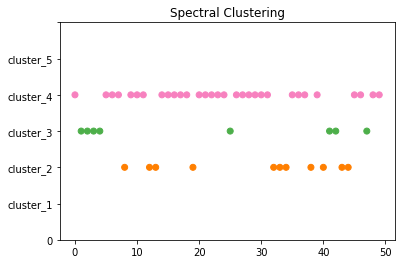

In [46]:
x = [data[i][0] for i in range(0, 50)]
y = [data[j][1] for j in range(0, 50)]
fig, ax = plt.subplots()

ax.scatter(x, y, color=colors[cluster_assignments])
ax.set_ylim(-1, 5)
ax.set_yticklabels(['0', 'cluster_1', 'cluster_2',
               'cluster_3', 'cluster_4',
               'cluster_5'])
ax.set_title("Spectral Clustering")
fig.savefig('50art_3Clus', format='jpg')

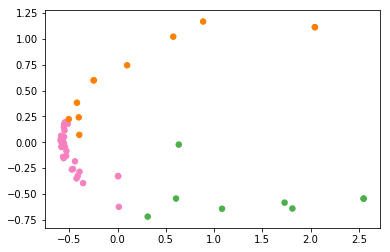

In [47]:
fig1, ax1 = plt.subplots()
ax1.scatter(data2D[:,0], data2D[:,1], s=30, color=colors[cluster_assignments])
fig1.savefig('50art_3clus_pcaPlot', format='jpg')